In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9563.0485,167290942.2917,12934.1000,0.0008,0.9940,1.4474
1,10314.8042,180138745.4049,13421.5776,-0.0474,1.0049,1.4606
2,7754.3124,89073305.8113,9437.8655,-0.1278,1.0582,1.8419
3,8692.0100,120655707.6462,10984.3392,-0.0075,1.0904,1.8684
4,8842.0285,140547179.2950,11855.2596,-0.0453,0.9645,1.4028
5,9061.8211,155705379.6752,12478.1962,-0.0016,0.9449,1.3414
6,9078.8255,148493634.2038,12185.7964,-0.0104,0.9987,1.5184
7,10476.3586,186396631.3149,13652.7152,-0.0249,1.0410,1.5498
8,9551.2779,157926890.6410,12566.8966,-0.0201,1.0602,1.7047


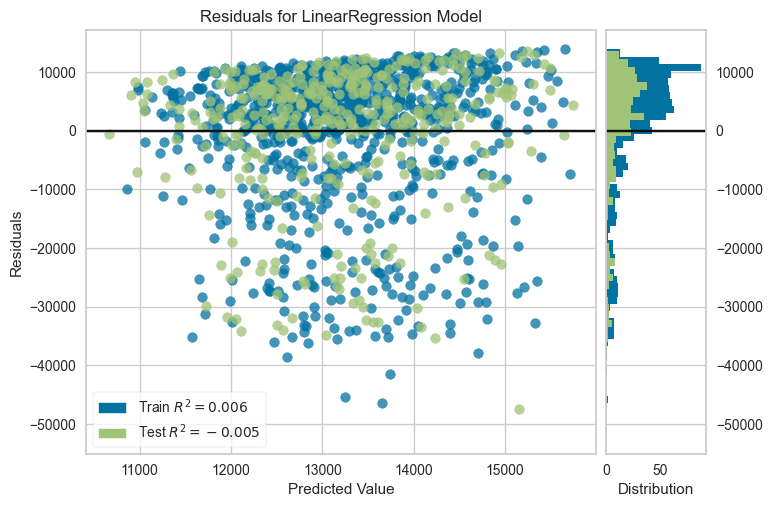

In [5]:
plot_model(lr)

# Experiment 2

In [6]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [7]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9840.3058,175186573.3466,13235.8065,-0.0464,1.0089,1.5013
1,10270.4244,182039258.5862,13492.1925,-0.0584,0.9977,1.4382
2,7937.9286,97418576.5613,9870.0849,-0.2334,1.0754,1.8840
3,8512.4464,122768253.0452,11080.0836,-0.0251,1.0802,1.8200
4,9254.0978,150575290.6980,12270.9124,-0.1199,0.9937,1.4624
5,9134.1775,161605763.6231,12712.4256,-0.0396,0.9374,1.2849
6,9343.7413,154360135.6190,12424.1755,-0.0503,1.0217,1.6030
7,10558.6020,187191863.1897,13681.8077,-0.0293,1.0496,1.5571
8,9700.4627,166268240.4193,12894.5043,-0.0739,1.0752,1.7271


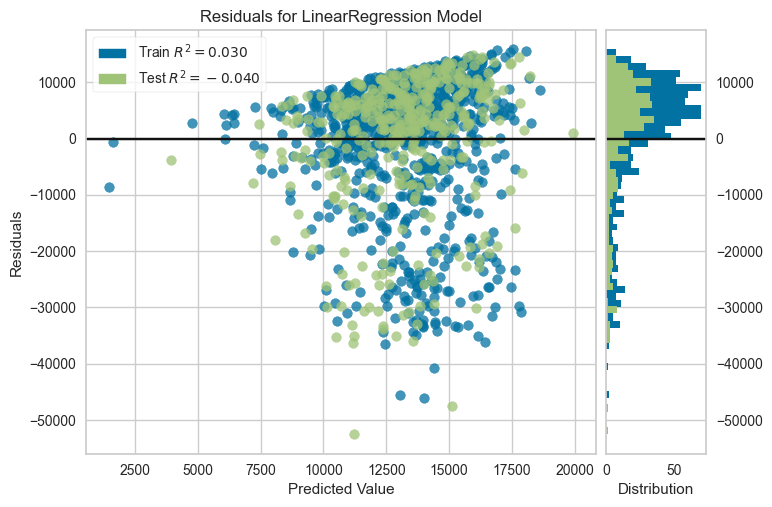

In [8]:
plot_model(lr)

In [9]:
save_model(lr, 'deployment_20231111')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  Transformer

In [10]:
deployment_20231111 = load_model('deployment_20231111')

Transformation Pipeline and Model Successfully Loaded


In [11]:
deployment_20231111

Pipeline(memory=FastMemory(location=C:\Users\gueva\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])